In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
data=pd.read_csv('titanic.csv')

In [22]:
data.head()
from sklearn.preprocessing import LabelEncoder
lb_sex=LabelEncoder()
data['new_sex']=lb_sex.fit_transform(data['Sex'])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [23]:
independent=data[['Pclass','new_sex','Age','Fare']]

In [24]:
independent.head()

,Pclass,new_sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [25]:
dependent=data.Survived

In [26]:
dependent.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [43]:
 X_train, X_test, y_train, y_test =train_test_split(independent,dependent,test_size=0.2)

In [44]:
model=DecisionTreeClassifier()

In [45]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
model.score(X_test,y_test)

0.8212290502793296

In [47]:
y_predict=model.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)

In [49]:
cm

array([[97, 21],
       [11, 50]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_predict,y_test))
accuracyscore=accuracy_score(y_predict,y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       118
           1       0.70      0.82      0.76        61

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179



In [51]:
accuracyscore

0.8212290502793296

[Text(0.49386160714285715, 0.9642857142857143, 'x[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [438, 274]'),
 Text(0.22767857142857142, 0.8928571428571429, 'x[0] <= 2.5\ngini = 0.363\nsamples = 248\nvalue = [59, 189]'),
 Text(0.13392857142857142, 0.8214285714285714, 'x[3] <= 83.317\ngini = 0.2\nsamples = 136\nvalue = [7, 129]'),
 Text(0.07142857142857142, 0.75, 'x[2] <= 37.0\ngini = 0.107\nsamples = 96\nvalue = [5, 91]'),
 Text(0.03571428571428571, 0.6785714285714286, 'x[2] <= 25.5\ngini = 0.031\nsamples = 64\nvalue = [1, 63]'),
 Text(0.017857142857142856, 0.6071428571428571, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.05357142857142857, 0.6071428571428571, 'x[2] <= 27.0\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.03571428571428571, 0.5357142857142857, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.5357142857142857, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.10714285714285714, 0.6785714285714286, 'x[3] <= 11.75\ngini = 0.219

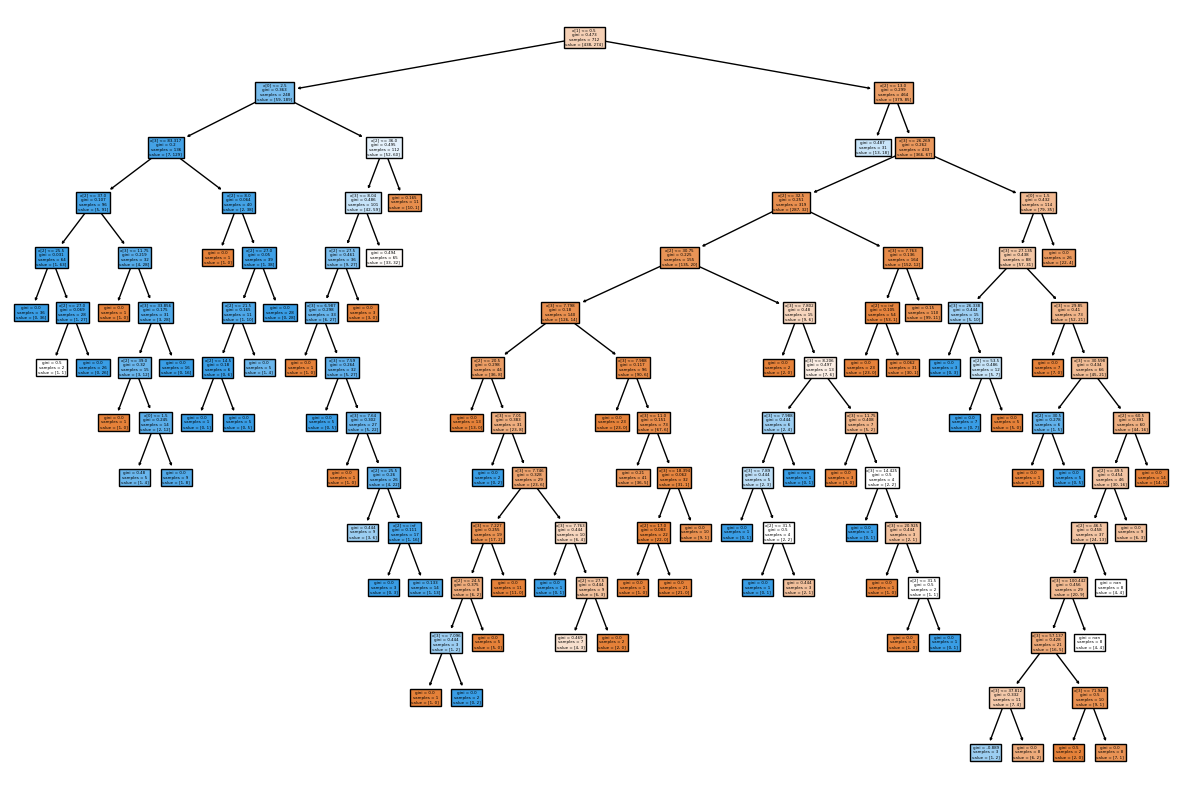

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)